# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [74]:
df.head(5)

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [75]:
# 1.a)
df['media'] = (1/2) * df['p1'] + (1/2) * df['p2']
df.head(5)

,p1,p2,media
0,6.964692,7.943428,7.454060
1,2.861393,5.099537,3.980465
2,2.268515,0.974429,1.621472
3,5.513148,4.474359,4.993754
4,7.194690,8.938402,8.066546


In [76]:
# 1. a)
df['diferenca'] = df['p2'] - df['p1']
df.head(5)

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [77]:
# 1. b)
corr_b = df[['p1', 'p2']].corr()
corr_b

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [78]:
# 1. c)
corr_c = df[['media', 'diferenca']].corr()
corr_c

,media,diferenca
media,1.000000,0.133474
diferenca,0.133474,1.000000


#### 1. d) Resposta: p1 e p2 tem uma forte correlação, indicando que quando p1 é alto, p2 também tende a ser alto (e vice-versa). Já a média e a evolução mostram ser independentes entre si, impossibilitando uma conclusão sólida quando se trata apenas de correlação.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [79]:
df['soma'] = df['p2'] + df['p1']
df.head(5)

,p1,p2,media,diferenca,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


In [80]:
corr_2 = df[['soma', 'diferenca']].corr()
corr_2

,soma,diferenca
soma,1.000000,0.133474
diferenca,0.133474,1.000000


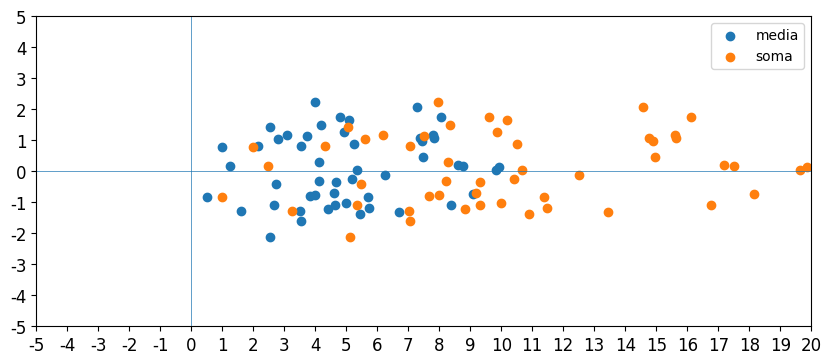

In [81]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')


#linhas horizontais e verticais
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a média
plt.scatter(df['media'], df['diferenca'], label='media')

# Plotar a soma
plt.scatter(df['soma'], df['diferenca'], label='soma')

#Legenda
plt.legend()

#### 2. Resposta: Podemos observar que a soma é igual a 2 * media, e a soma comporta-se como uma transformação linear de escalar 2. Nota-se que a soma é exatamente a média multiplicada por 2 explanada no gráfico, esticando  o mesmo. A correlação de soma e diferença também é exatamente a mesma entre média e diferença.